In [21]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [22]:
import zipfile
import os
zip_file_path = r'C:\Users\vivek\OneDrive\Desktop\Machine Learning(IA)\ML_Assignments\Datasets\connectionist+bench+sonar+mines+vs+rocks.zip'
extract_dir = r'C:\Users\vivek\OneDrive\Desktop\Machine Learning(IA)\ML_Assignments\Datasets\sonar_data'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    print(zip_ref.namelist())
print(f"Files extracted to: {extract_dir}")


['sonar.all-data', 'sonar.mines', 'sonar.rocks', 'Index', 'sonar.names']
Files extracted to: C:\Users\vivek\OneDrive\Desktop\Machine Learning(IA)\ML_Assignments\Datasets\sonar_data


In [ ]:
import pandas as pd
import os
data_path = os.path.join(r'C:\Users\vivek\OneDrive\Desktop\Machine Learning(IA)\ML_Assignments\Datasets\sonar_data', 'sonar.all-data')

# Load the data
columns = [f"A{i+1}" for i in range(61)]  
data = pd.read_csv(data_path, header=None)

data.columns = columns
print(data.head())


       A1      A2      A3      A4      A5      A6      A7      A8      A9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

      A10  ...     A52     A53     A54     A55     A56     A57     A58  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      A59     A60  A61  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078

In [ ]:
# Explor the data
print("Missing values in each column:\n", data.isnull().sum())
print("\nDescriptive statistics of the dataset:\n", data.describe())


Missing values in each column:
 A1     0
A2     0
A3     0
A4     0
A5     0
      ..
A57    0
A58    0
A59    0
A60    0
A61    0
Length: 61, dtype: int64

Descriptive statistics of the dataset:
                A1          A2          A3          A4          A5          A6  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               A7          A8          A9         A10  ...         A51  \

In [29]:
print(data.columns)


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41',
       'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51',
       'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61'],
      dtype='object')


In [30]:
# Encode the target variable 'R' and 'M' as 0 and 1
data['A61'] = data['A61'].map({'M': 0, 'R': 1})

# Verify the change
print(data['A61'].head())




0    1
1    1
2    1
3    1
4    1
Name: A61, dtype: int64


In [33]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]

In [34]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# Standardization 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Train, predict, and evaluate
for name, model in models.items():
    print(f"\n{name}")
    start_time = time.time()

    # Fit and predict
    if name in ["Logistic Regression", "SVM (RBF Kernel)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    end_time = time.time()
    runtime = end_time - start_time

    # Print model performance
    print(f"Runtime: {runtime:.4f} seconds")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)



Logistic Regression
Runtime: 0.0217 seconds
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.93      0.70      0.80        20

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42

Confusion Matrix:
[[21  1]
 [ 6 14]]

SVM (RBF Kernel)
Runtime: 0.0124 seconds
Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.94      0.75      0.83        20

    accuracy                           0.86        42
   macro avg       0.87      0.85      0.85        42
weighted avg       0.87      0.86      0.86        42

Confusion Matrix:
[[21  1]
 [ 5 15]]

Decision Tree
Runtime: 0.0130 seconds
Accuracy: 0.8095238095238095
              precision    recall  f1-score   support

    

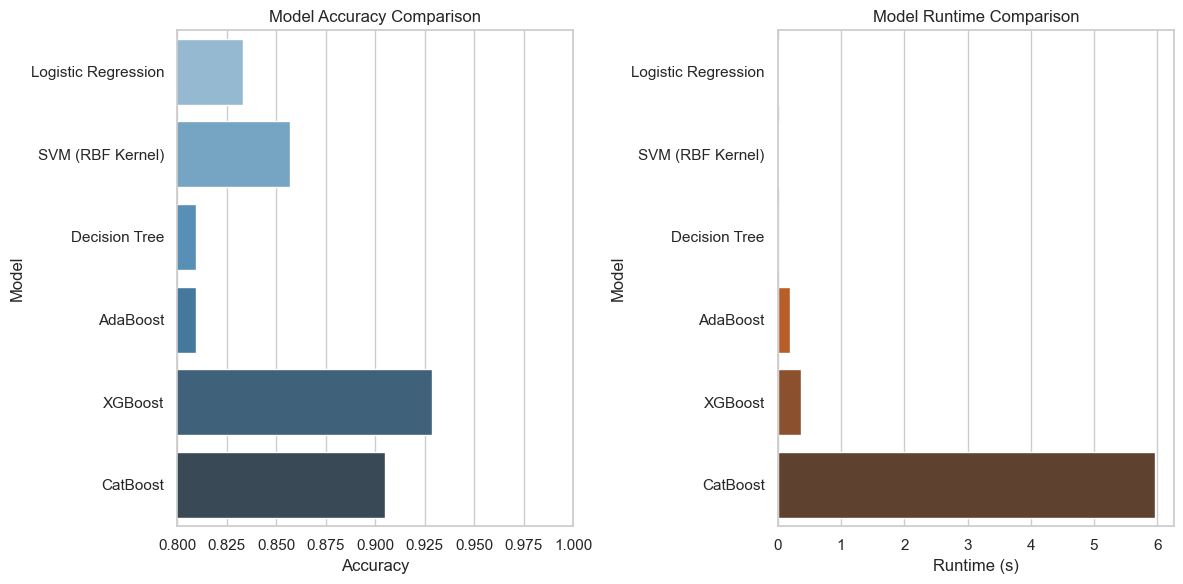

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Model performance summary with the updated values
data = {
    "Model": [
        "Logistic Regression",
        "SVM (RBF Kernel)",
        "Decision Tree",
        "AdaBoost",
        "XGBoost",
        "CatBoost"
    ],
    "Accuracy": [
        0.8333333333333334,  # Logistic Regression
        0.8571428571428571,  # SVM (RBF Kernel)
        0.8095238095238095,  # Decision Tree
        0.8095238095238095,  # AdaBoost
        0.9285714285714286,  # XGBoost
        0.9047619047619048   # CatBoost
    ],
    "Runtime (s)": [
        0.0230,  # Logistic Regression
        0.0122,  # SVM (RBF Kernel)
        0.0072,  # Decision Tree
        0.1942,  # AdaBoost
        0.3657,  # XGBoost
        5.9662   # CatBoost
    ],
    "F1-Score": [
        0.83,  # Logistic Regression (weighted)
        0.86,  # SVM (weighted)
        0.81,  # Decision Tree (weighted)
        0.80,  # AdaBoost (weighted)
        0.93,  # XGBoost (weighted)
        0.90   # CatBoost (weighted)
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Create plots
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
sns.barplot(x="Accuracy", y="Model", data=df, palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.xlim(0.8, 1.0)  # Adjust x-axis limits to better show the differences

# Runtime plot
plt.subplot(1, 2, 2)
sns.barplot(x="Runtime (s)", y="Model", data=df, palette="Oranges_d")
plt.title("Model Runtime Comparison")

# Layout adjustment
plt.tight_layout()
plt.show()
